Part 1: Import libarary and Read datatset

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [57]:
data = pd.read_csv("Hotel Reservations.csv")
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [59]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Part 2: Data Preprocessing I (Data visualization and Data Cleaning)

array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>],
       [<Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'avg_price_per_room'}>,
        <Axes: title={'center': 'no_of_special_requests'}>, <Axes: >,
        <Axes: >]], dtype=object)

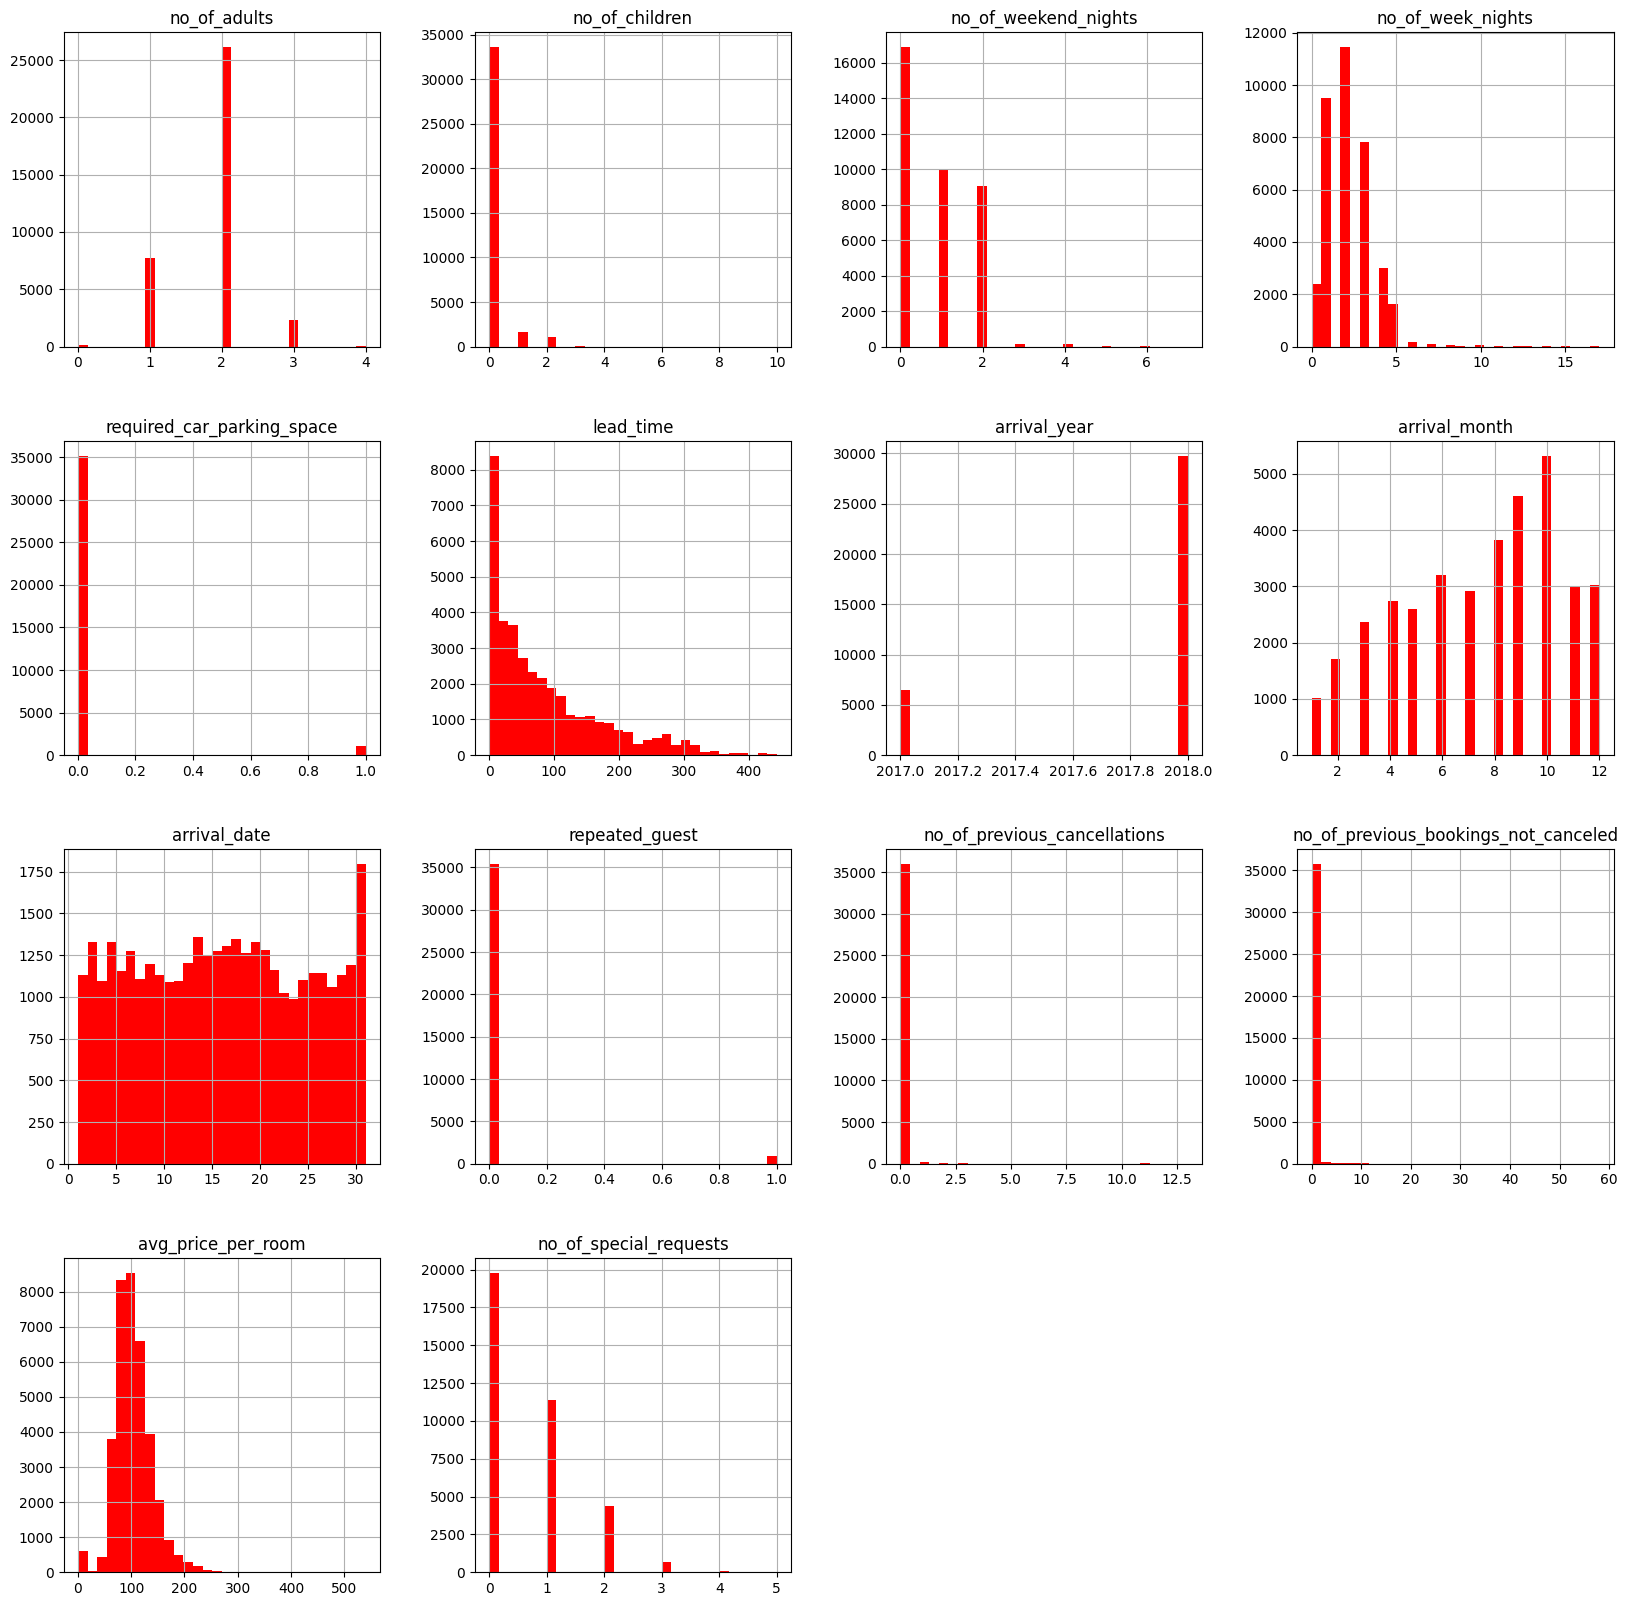

In [60]:
data.hist(bins = 30, figsize = (20,20), color = 'r')

In [61]:
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0) 
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


In [62]:
df = data['lead_time']
z_scores = (df - df.mean()) / df.std()
data['lead_time'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_adults']
z_scores = (df - df.mean()) / df.std()
data['no_of_adults'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_children']
z_scores = (df - df.mean()) / df.std()
data['no_of_children'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_week_nights']
z_scores = (df - df.mean()) / df.std()
data['no_of_week_nights'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_weekend_nights']
z_scores = (df - df.mean()) / df.std()
data['no_of_weekend_nights'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_previous_cancellations']
z_scores = (df - df.mean()) / df.std()
data['no_of_previous_cancellations'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_previous_bookings_not_canceled']
z_scores = (df - df.mean()) / df.std()
data['no_of_previous_bookings_not_canceled'] = df[(np.abs(z_scores) < 3)]

df = data['avg_price_per_room']
z_scores = (df - df.mean()) / df.std()
data['avg_price_per_room'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_special_requests']
z_scores = (df - df.mean()) / df.std()
data['no_of_special_requests'] = df[(np.abs(z_scores) < 3)]


In [63]:
data = data.dropna()
data = data.reset_index(drop=True)
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1.0,2.0,Meal Plan 1,0,Room_Type 1,224.0,2017,10,2,Offline,0,0.0,0.0,65.00,0.0,0
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0,Room_Type 1,5.0,2018,11,6,Online,0,0.0,0.0,106.68,1.0,0
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0,Room_Type 1,1.0,2018,2,28,Online,0,0.0,0.0,60.00,0.0,1
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0,Room_Type 1,211.0,2018,5,20,Online,0,0.0,0.0,100.00,0.0,1
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0,Room_Type 1,48.0,2018,4,11,Online,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,INN36271,3.0,0.0,2.0,6.0,Meal Plan 1,0,Room_Type 4,85.0,2018,8,3,Online,0,0.0,0.0,167.80,1.0,0
33340,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0,Room_Type 1,228.0,2018,10,17,Online,0,0.0,0.0,90.95,2.0,1
33341,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0,Room_Type 1,148.0,2018,7,1,Online,0,0.0,0.0,98.39,2.0,0
33342,INN36274,2.0,0.0,0.0,3.0,Not Selected,0,Room_Type 1,63.0,2018,4,21,Online,0,0.0,0.0,94.50,0.0,1


<Axes: >

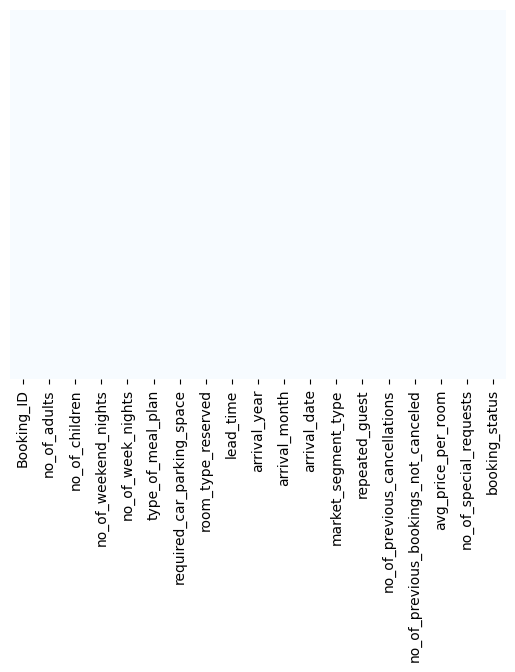

In [64]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>],
       [<Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'avg_price_per_room'}>,
        <Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'booking_status'}>, <Axes: >]],
      dtype=object)

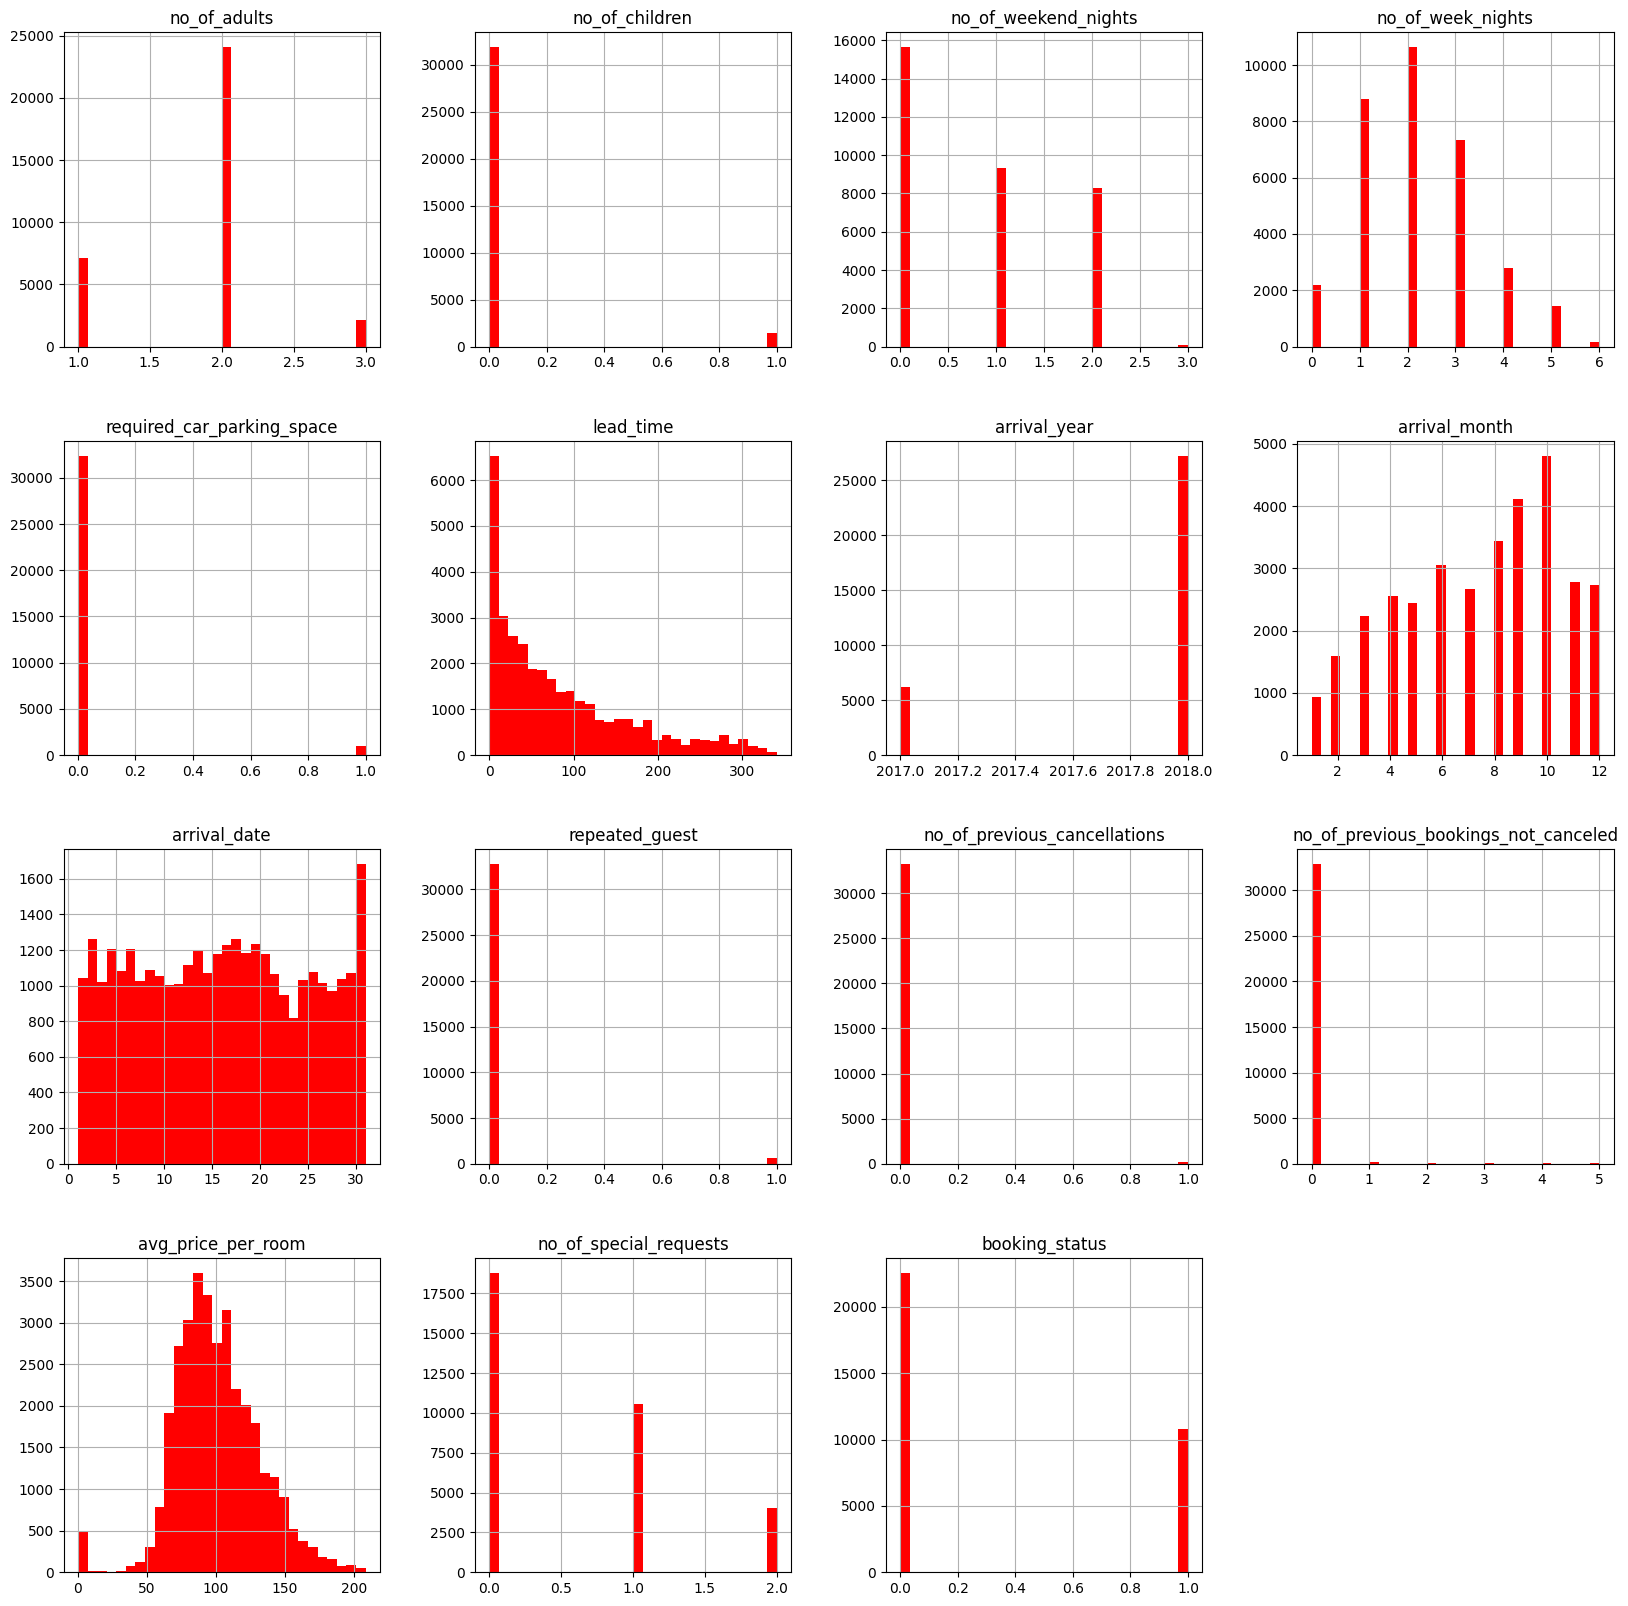

In [65]:
data.hist(bins = 30, figsize = (20,20), color = 'r')

Part 3: Data Preprocessing II (One-Hot Encoder and Over-Samping)

In [66]:
data_int = data.select_dtypes(include=['int', 'float'])
data_int

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2.0,0,224.0,2017,10,2,0,0.0,0.0,65.00,0.0,0
1,2.0,0.0,2.0,3.0,0,5.0,2018,11,6,0,0.0,0.0,106.68,1.0,0
2,1.0,0.0,2.0,1.0,0,1.0,2018,2,28,0,0.0,0.0,60.00,0.0,1
3,2.0,0.0,0.0,2.0,0,211.0,2018,5,20,0,0.0,0.0,100.00,0.0,1
4,2.0,0.0,1.0,1.0,0,48.0,2018,4,11,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,3.0,0.0,2.0,6.0,0,85.0,2018,8,3,0,0.0,0.0,167.80,1.0,0
33340,2.0,0.0,1.0,3.0,0,228.0,2018,10,17,0,0.0,0.0,90.95,2.0,1
33341,2.0,0.0,2.0,6.0,0,148.0,2018,7,1,0,0.0,0.0,98.39,2.0,0
33342,2.0,0.0,0.0,3.0,0,63.0,2018,4,21,0,0.0,0.0,94.50,0.0,1


In [67]:
data_object = data.select_dtypes(include=['object'])
data_object = data_object.drop('Booking_ID', axis=1)
data_object

,type_of_meal_plan,room_type_reserved,market_segment_type
0,Meal Plan 1,Room_Type 1,Offline
1,Not Selected,Room_Type 1,Online
2,Meal Plan 1,Room_Type 1,Online
3,Meal Plan 1,Room_Type 1,Online
4,Not Selected,Room_Type 1,Online
...,...,...,...
33339,Meal Plan 1,Room_Type 4,Online
33340,Meal Plan 1,Room_Type 1,Online
33341,Meal Plan 1,Room_Type 1,Online
33342,Not Selected,Room_Type 1,Online


In [68]:
onehotencoder = OneHotEncoder()
data_object = onehotencoder.fit_transform(data_object).toarray()
data_object.shape

(33344, 16)

In [69]:
feature_names = onehotencoder.get_feature_names_out()

data_object_name = pd.DataFrame(data_object, columns=feature_names)
data_object_name

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33340,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33342,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
data_all = pd.concat([data_object_name, data_int], axis = 1)
data_all

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,224.0,2017,10,2,0,0.0,0.0,65.00,0.0,0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2018,11,6,0,0.0,0.0,106.68,1.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2018,2,28,0,0.0,0.0,60.00,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,211.0,2018,5,20,0,0.0,0.0,100.00,0.0,1
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,48.0,2018,4,11,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,85.0,2018,8,3,0,0.0,0.0,167.80,1.0,0
33340,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,228.0,2018,10,17,0,0.0,0.0,90.95,2.0,1
33341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,148.0,2018,7,1,0,0.0,0.0,98.39,2.0,0
33342,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,63.0,2018,4,21,0,0.0,0.0,94.50,0.0,1


array([[<Axes: title={'center': 'type_of_meal_plan_Meal Plan 1'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 2'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 3'}>,
        <Axes: title={'center': 'type_of_meal_plan_Not Selected'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 1'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 2'}>],
       [<Axes: title={'center': 'room_type_reserved_Room_Type 3'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 4'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 5'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 6'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 7'}>,
        <Axes: title={'center': 'market_segment_type_Aviation'}>],
       [<Axes: title={'center': 'market_segment_type_Complementary'}>,
        <Axes: title={'center': 'market_segment_type_Corporate'}>,
        <Axes: title={'center': 'market_segment_t

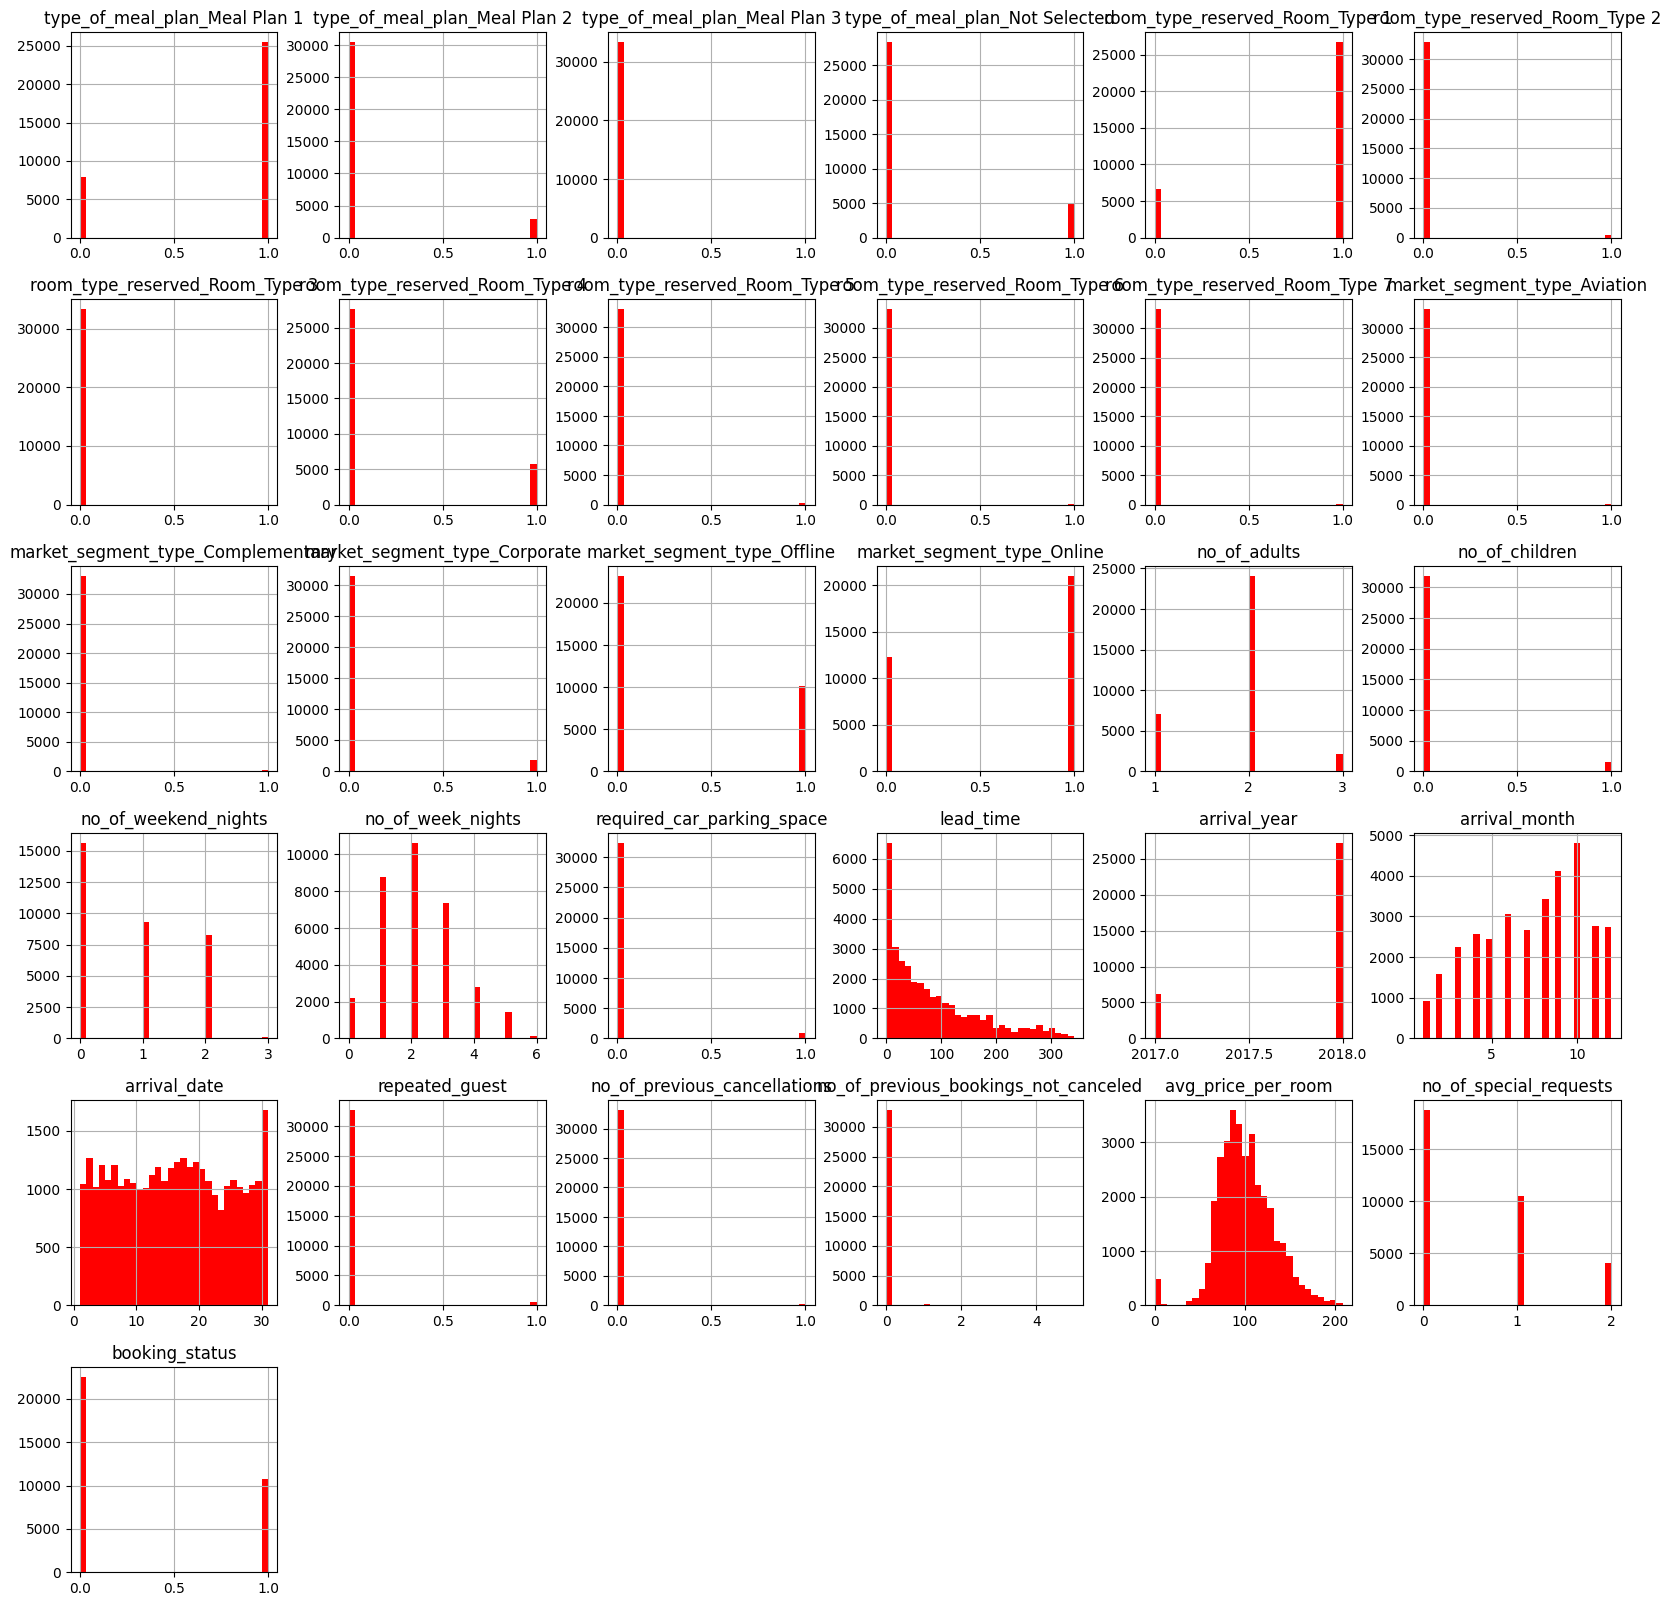

In [71]:
data_all.hist(bins = 30, figsize = (20,20), color = 'r')

In [72]:
X = data_all.drop('booking_status', axis=1)
y = data_all['booking_status']

In [73]:
# create a SMOTE object
smote = SMOTE()

# fit the SMOTE object to the data and oversample
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# combine the oversampled data into a new DataFrame
df_oversampled = pd.concat([pd.DataFrame(X_oversampled), pd.DataFrame(y_oversampled)], axis=1)
df_oversampled

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,224.000000,2017,10,2,0,0.0,0.0,65.000000,0.000000,0
1,0.000000,0.000000,0.0,1.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,5.000000,2018,11,6,0,0.0,0.0,106.680000,1.000000,0
2,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,1.000000,2018,2,28,0,0.0,0.0,60.000000,0.000000,1
3,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,211.000000,2018,5,20,0,0.0,0.0,100.000000,0.000000,1
4,0.000000,0.000000,0.0,1.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,48.000000,2018,4,11,0,0.0,0.0,94.500000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45089,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,178.000000,2018,8,18,0,0.0,0.0,124.500000,0.000000,1
45090,0.351312,0.000000,0.0,0.648688,1.000000,0.0,0.0,0.000000,0.0,0.0,...,124.594754,2018,5,8,0,0.0,0.0,104.132361,0.000000,1
45091,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,195.000000,2018,8,27,0,0.0,0.0,112.545493,1.000000,1
45092,0.345598,0.654402,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,156.308805,2018,7,16,0,0.0,0.0,105.420317,0.345598,1


array([[<Axes: title={'center': 'type_of_meal_plan_Meal Plan 1'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 2'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 3'}>,
        <Axes: title={'center': 'type_of_meal_plan_Not Selected'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 1'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 2'}>],
       [<Axes: title={'center': 'room_type_reserved_Room_Type 3'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 4'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 5'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 6'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 7'}>,
        <Axes: title={'center': 'market_segment_type_Aviation'}>],
       [<Axes: title={'center': 'market_segment_type_Complementary'}>,
        <Axes: title={'center': 'market_segment_type_Corporate'}>,
        <Axes: title={'center': 'market_segment_t

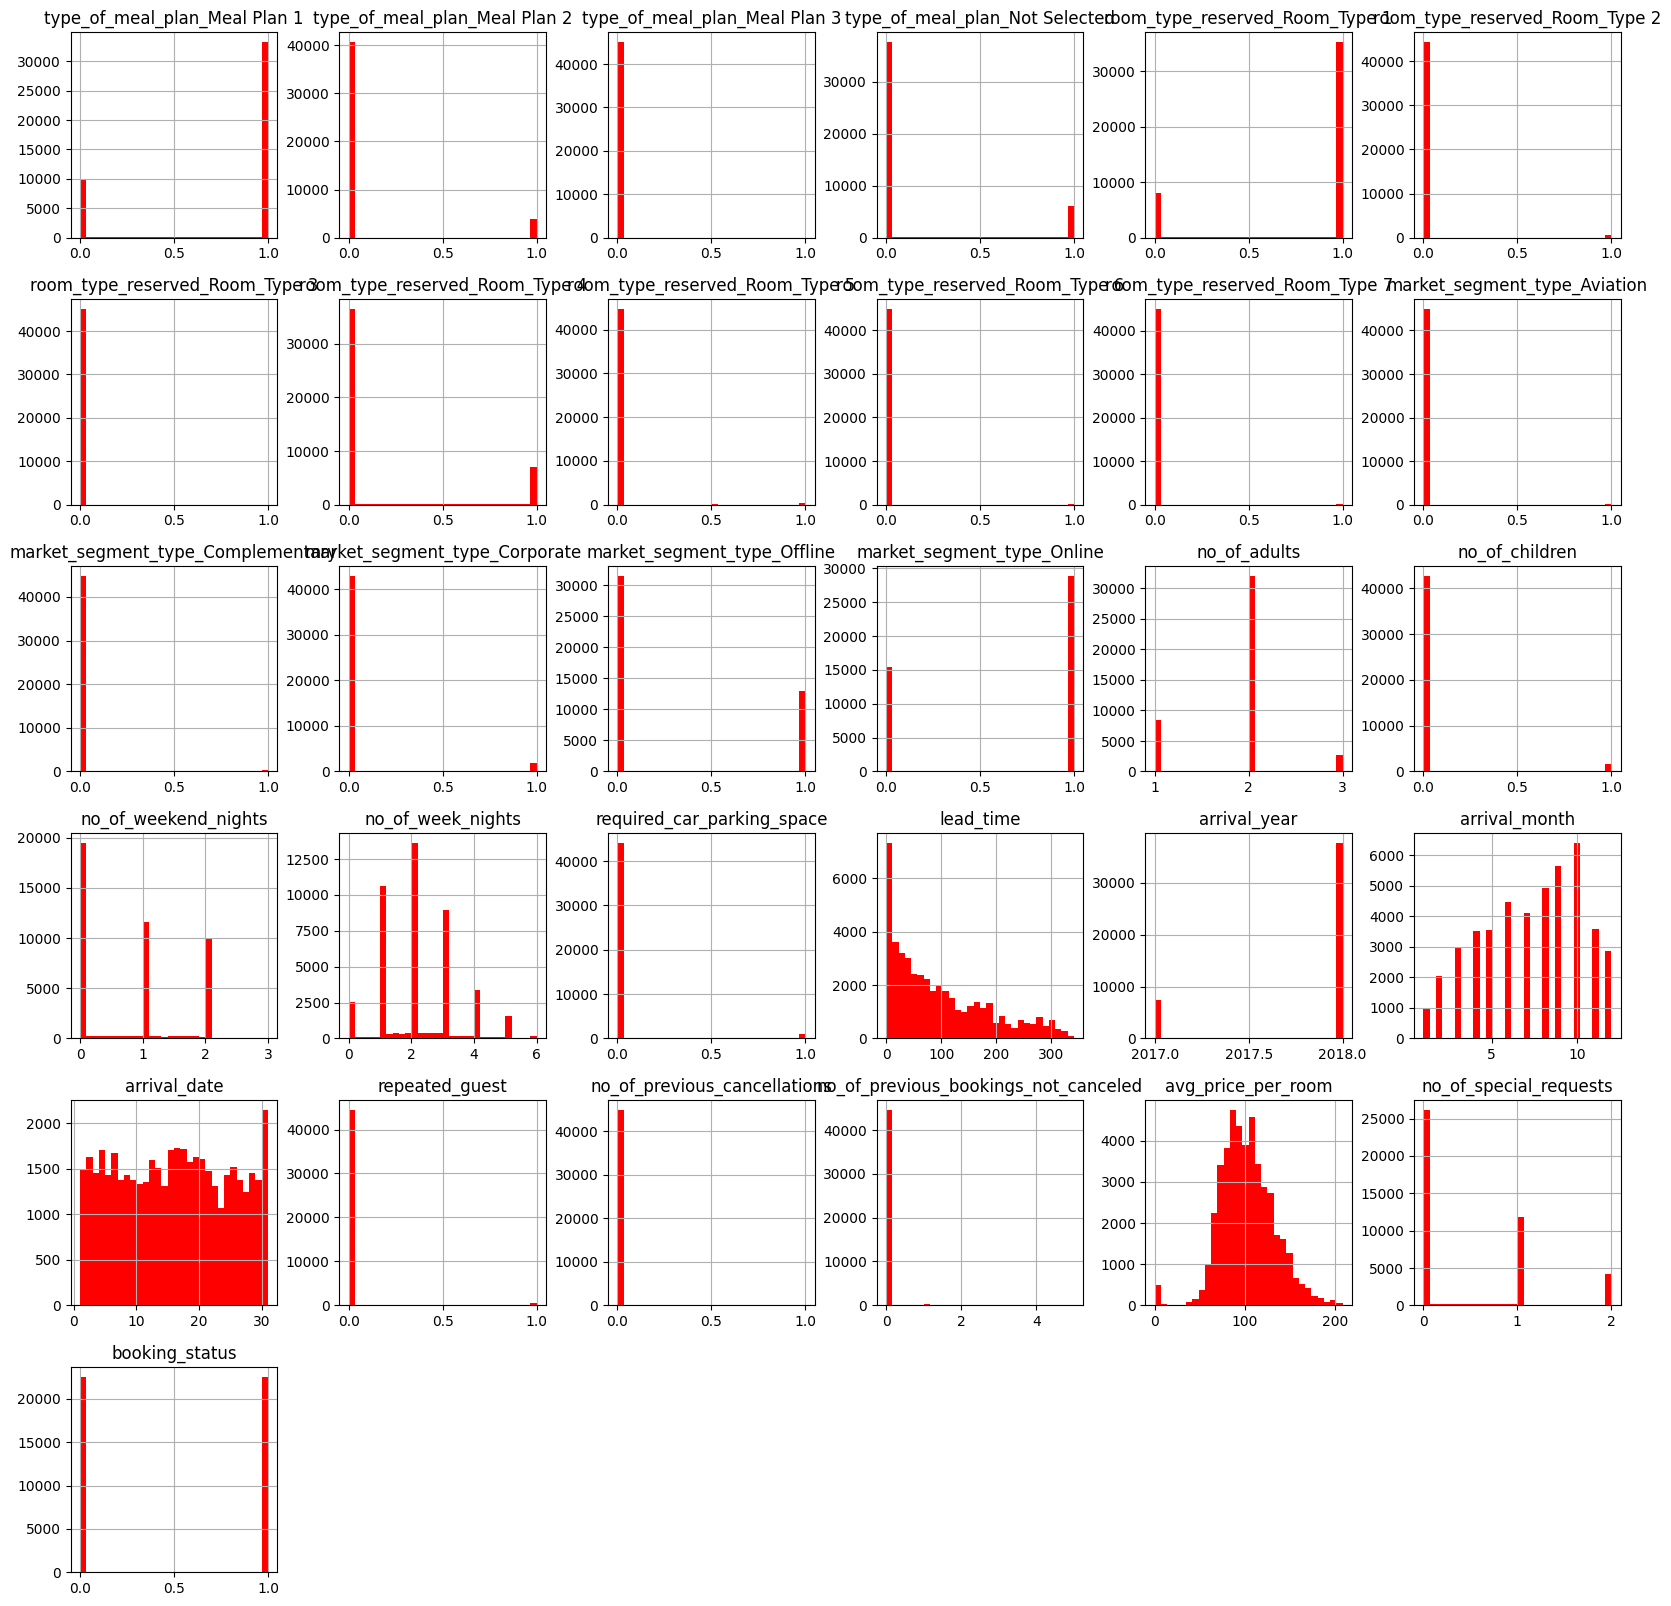

In [74]:
df_oversampled.hist(bins = 30, figsize = (20,20), color = 'r')

In [75]:
X = df_oversampled.drop('booking_status', axis=1)
y = df_oversampled['booking_status']

Part 4: Data Association and Correlation

In [76]:
X_apriori = pd.DataFrame({
  'type_of_meal_plan_Meal Plan 1': X['type_of_meal_plan_Meal Plan 1'].apply(lambda x: True if x >= 0.5 else False),
  'type_of_meal_plan_Meal Plan 2': X['type_of_meal_plan_Meal Plan 2'].apply(lambda x: True if x >= 0.5 else False),
  'type_of_meal_plan_Meal Plan 3': X['type_of_meal_plan_Meal Plan 3'].apply(lambda x: True if x >= 0.5 else False),
  'type_of_meal_plan_Not Selected': X['type_of_meal_plan_Not Selected'].apply(lambda x: True if x >= 0.5 else False),

  'room_type_reserved_Room_Type 1': X['room_type_reserved_Room_Type 1'].apply(lambda x: True if x >= 0.5 else False),
  'room_type_reserved_Room_Type 2': X['room_type_reserved_Room_Type 2'].apply(lambda x: True if x >= 0.5 else False),
  'room_type_reserved_Room_Type 3': X['room_type_reserved_Room_Type 3'].apply(lambda x: True if x >= 0.5 else False),
  'room_type_reserved_Room_Type 4': X['room_type_reserved_Room_Type 4'].apply(lambda x: True if x >= 0.5 else False),
  'room_type_reserved_Room_Type 5': X['room_type_reserved_Room_Type 5'].apply(lambda x: True if x >= 0.5 else False),
  'room_type_reserved_Room_Type 6': X['room_type_reserved_Room_Type 6'].apply(lambda x: True if x >= 0.5 else False),
  'room_type_reserved_Room_Type 7': X['room_type_reserved_Room_Type 7'].apply(lambda x: True if x >= 0.5 else False),

  'market_segment_type_Aviation': X['market_segment_type_Aviation'].apply(lambda x: True if x >= 0.5 else False),
  'market_segment_type_Complementary': X['market_segment_type_Complementary'].apply(lambda x: True if x >= 0.5 else False),
  'market_segment_type_Corporate': X['market_segment_type_Corporate'].apply(lambda x: True if x >= 0.5 else False),
  'market_segment_type_Offline': X['market_segment_type_Offline'].apply(lambda x: True if x >= 0.5 else False),
  'market_segment_type_Online': X['market_segment_type_Online'].apply(lambda x: True if x >= 0.5 else False),
})

X_apriori

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True
2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45089,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
45090,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True
45091,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
45092,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True


In [77]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [78]:
frequent_itemsets = apriori(X_apriori, min_support=0.2, use_colnames=True)

res = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Filter rules based on the target variable
target_rules = res[res["consequents"].astype(str).str.contains(str(y.unique()[1]))]
target_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(type_of_meal_plan_Meal Plan 1),(room_type_reserved_Room_Type 1),0.757906,0.800905,0.568147,0.749627,0.935975,-0.038864,0.795194,-0.220305
1,(room_type_reserved_Room_Type 1),(type_of_meal_plan_Meal Plan 1),0.800905,0.757906,0.568147,0.709381,0.935975,-0.038864,0.833029,-0.255718
2,(market_segment_type_Offline),(type_of_meal_plan_Meal Plan 1),0.294784,0.757906,0.224708,0.762281,1.005773,0.001290,1.018405,0.008139
3,(market_segment_type_Online),(type_of_meal_plan_Meal Plan 1),0.649532,0.757906,0.478578,0.736804,0.972158,-0.013706,0.919826,-0.075543
4,(market_segment_type_Offline),(room_type_reserved_Room_Type 1),0.294784,0.800905,0.276733,0.938765,1.172130,0.040639,3.251318,0.208238
5,(market_segment_type_Online),(room_type_reserved_Room_Type 1),0.649532,0.800905,0.477336,0.734892,0.917578,-0.042877,0.750998,-0.204013
6,"(type_of_meal_plan_Meal Plan 1, market_segment...",(room_type_reserved_Room_Type 1),0.224708,0.800905,0.208720,0.928846,1.159746,0.028750,2.798102,0.177665
7,"(room_type_reserved_Room_Type 1, market_segmen...",(type_of_meal_plan_Meal Plan 1),0.276733,0.757906,0.208720,0.754227,0.995146,-0.001018,0.985032,-0.006698
8,(market_segment_type_Offline),"(type_of_meal_plan_Meal Plan 1, room_type_rese...",0.294784,0.568147,0.208720,0.708042,1.246231,0.041239,1.479162,0.280170


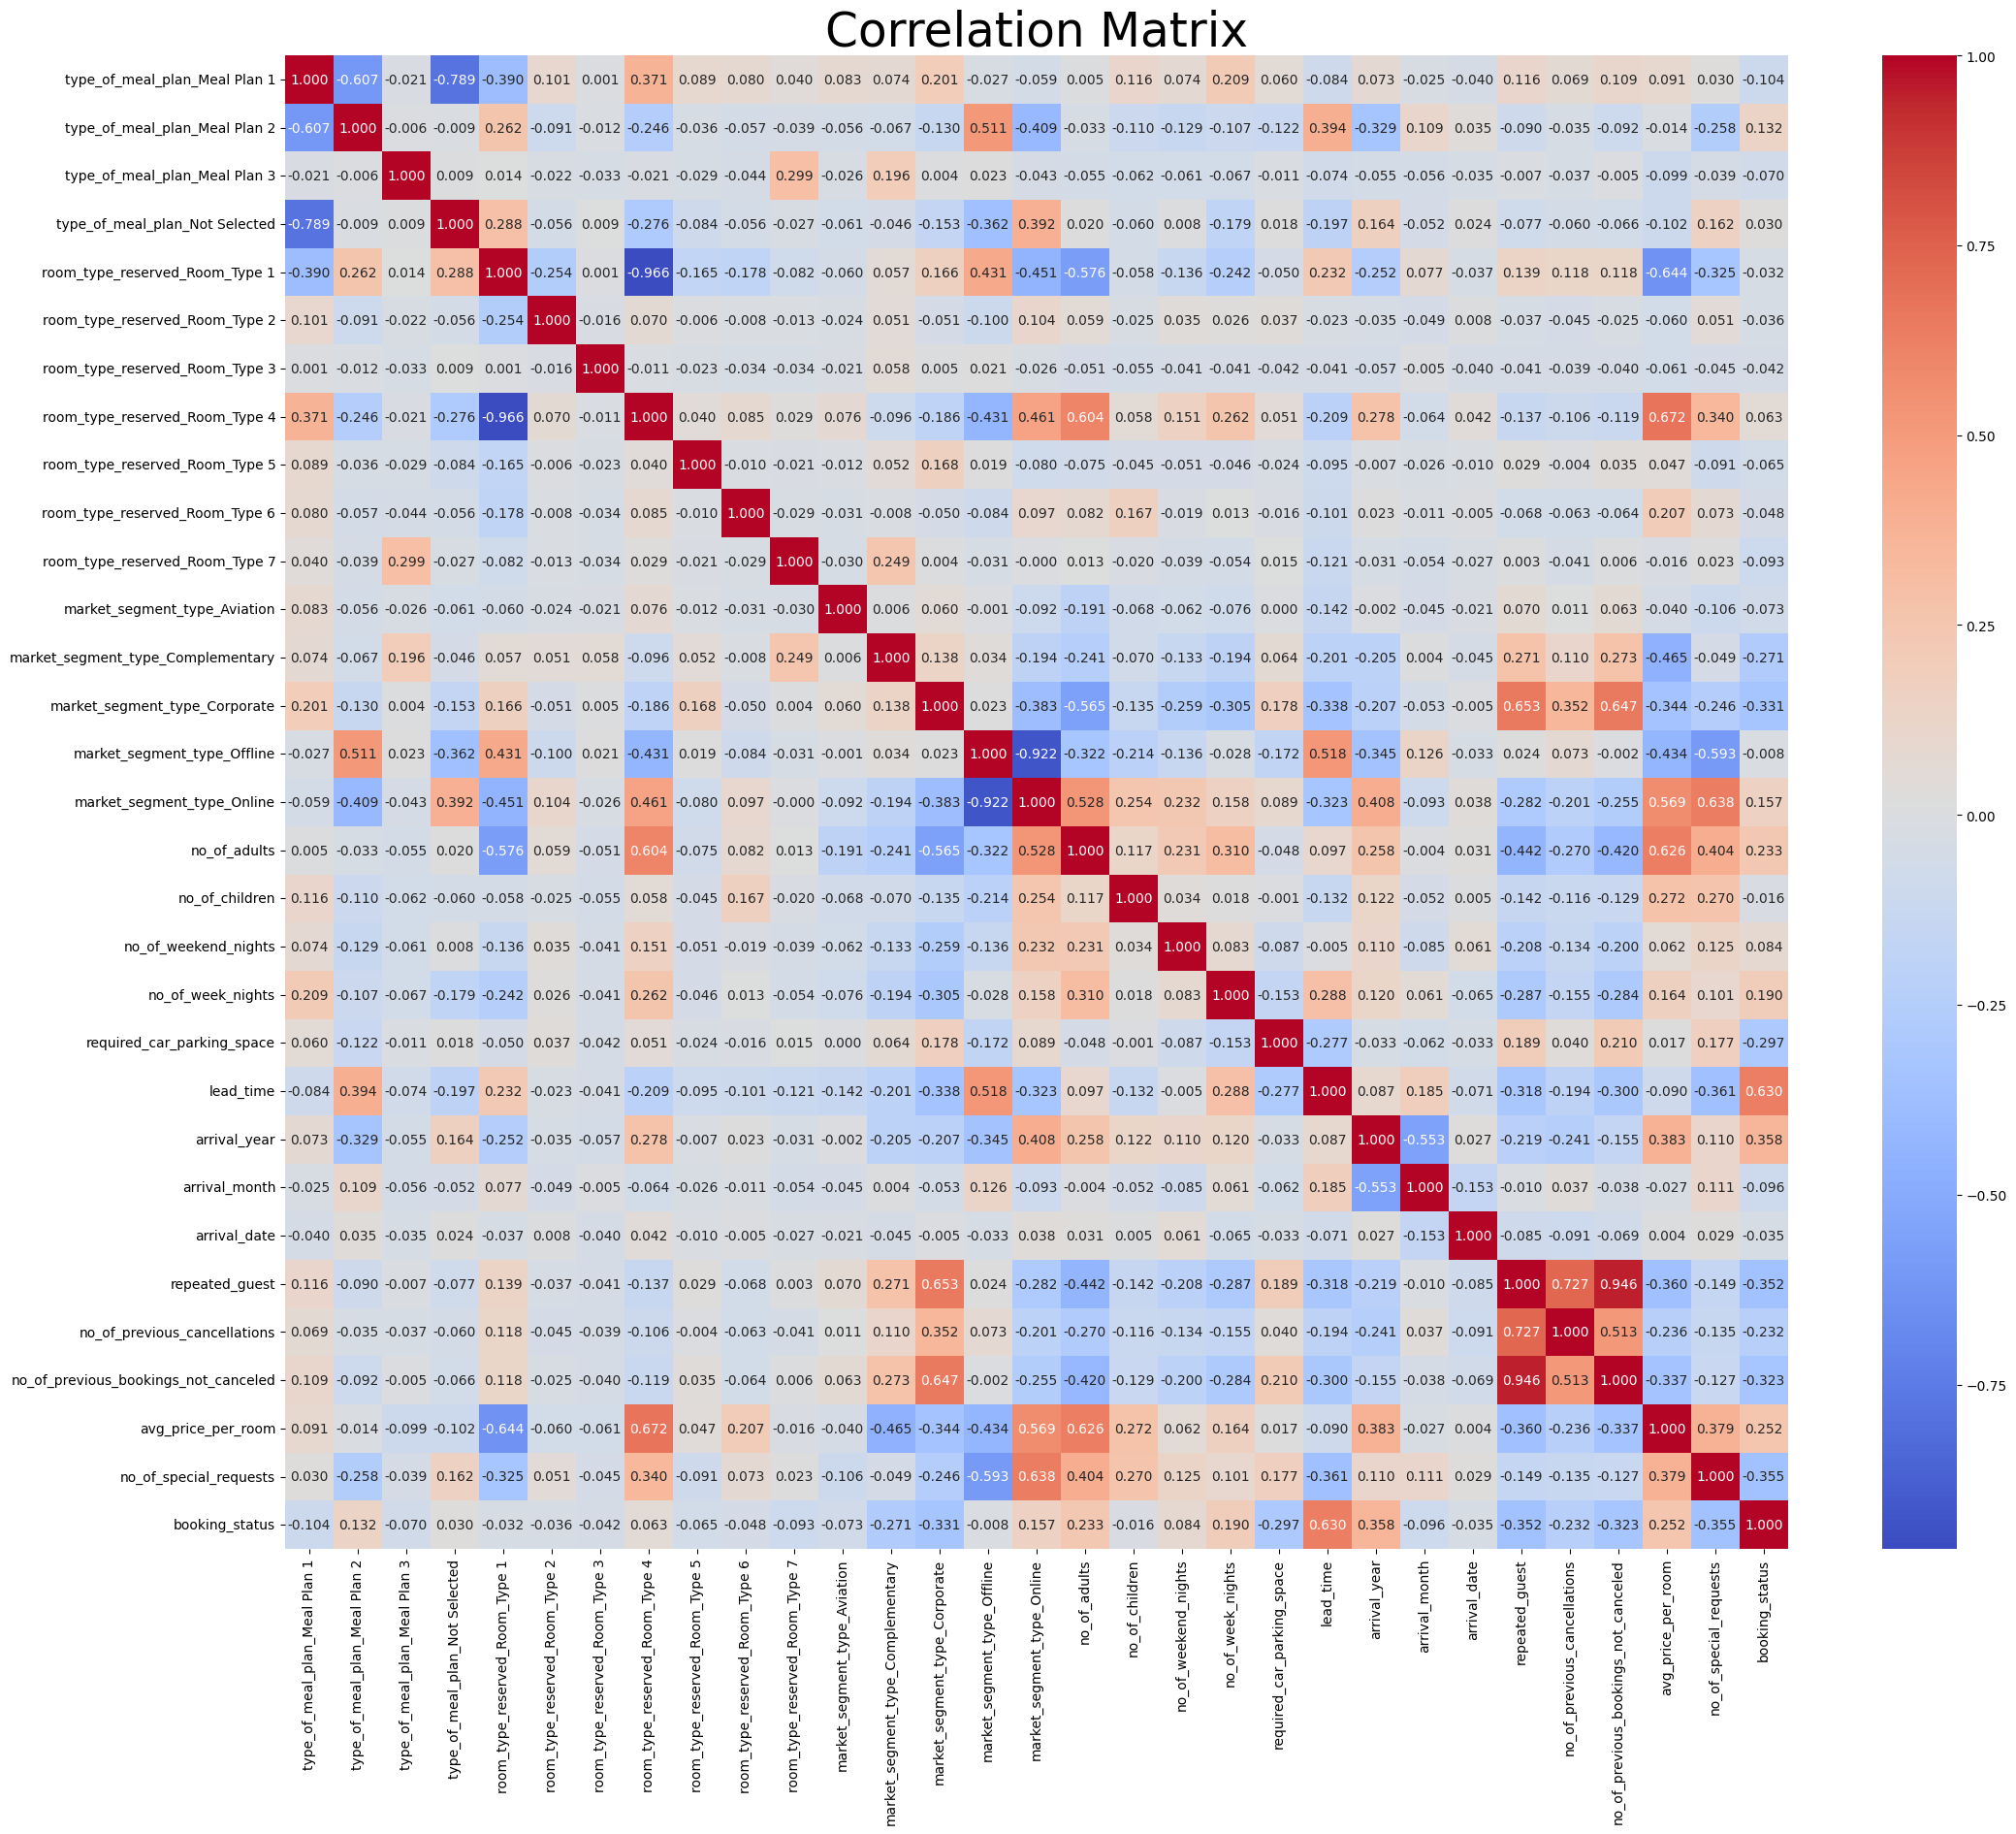

In [79]:
df_correlation = df_oversampled.corr()
corr = df_correlation.corr()

fig, ax = plt.subplots(figsize=(25, 20))

# Create heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.3f', ax=ax)
ax.set_title('Correlation Matrix', fontsize=35)

plt.show()

/var/folders/3l/0fkxv44s4277cxxnlw4sjqmr0000gn/T/ipykernel_27218/147386572.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_oversampled[df_oversampled['booking_status']==1][variable], ax=subplot, fill=True)


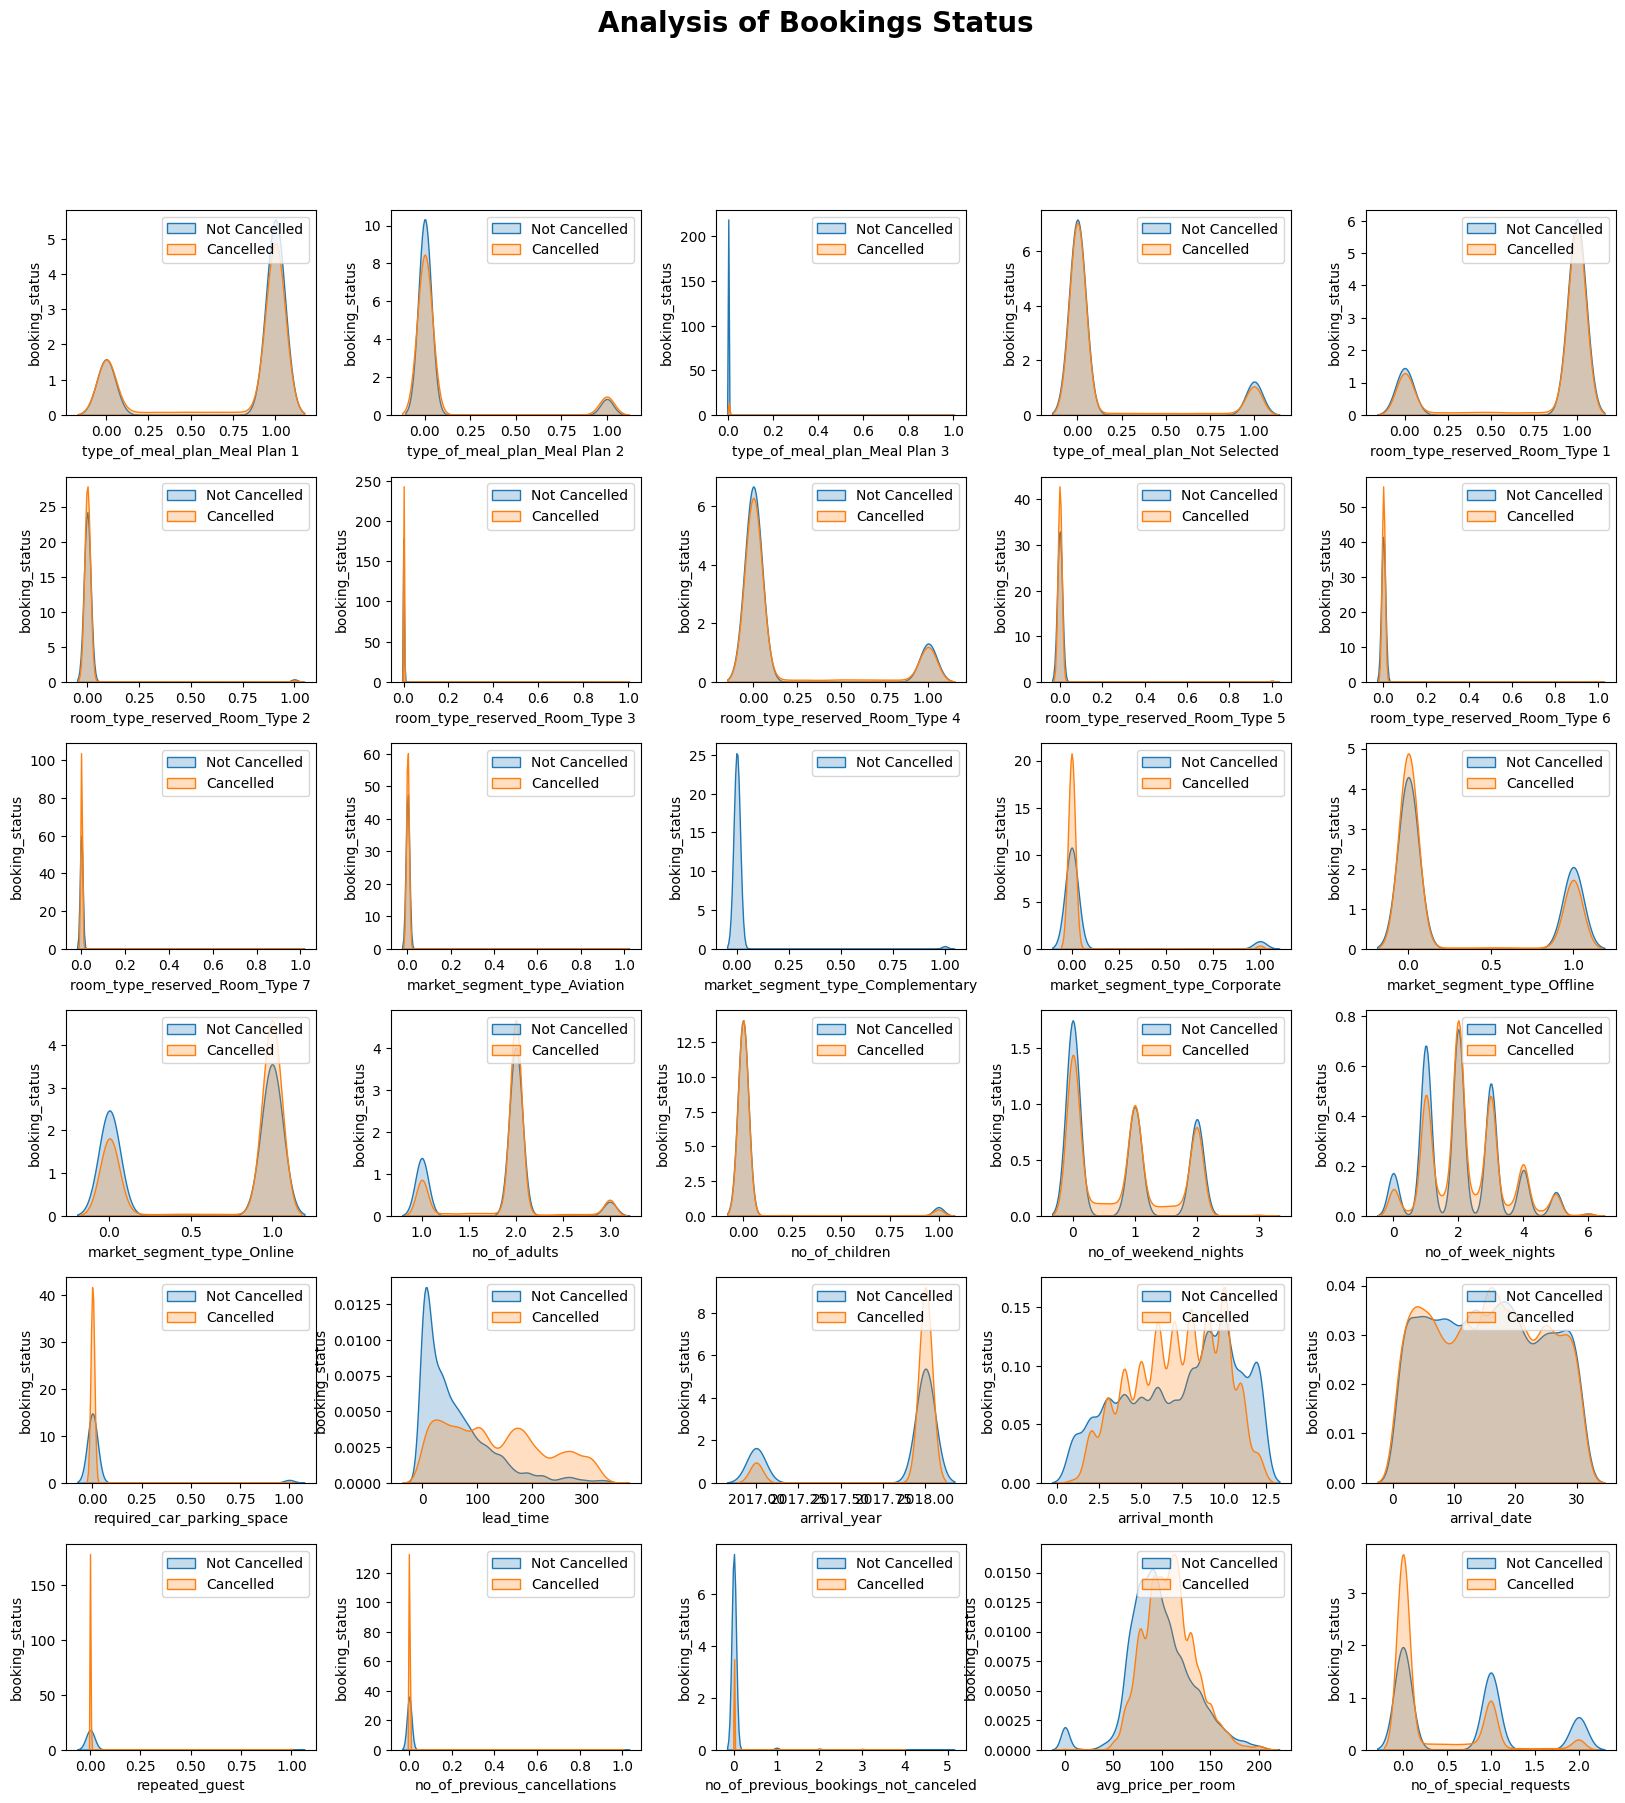

In [80]:
fig, ax = plt.subplots(6, 5, figsize=(20, 20))
plt.subplots_adjust(hspace = 0.3, wspace=0.3)
plt.suptitle('Analysis of Bookings Status', fontsize=20, fontweight='bold')
for variable, subplot in zip(X.columns, ax.flatten()):
    sns.kdeplot(df_oversampled[df_oversampled['booking_status']==0][variable], ax=subplot, fill=True)
    sns.kdeplot(df_oversampled[df_oversampled['booking_status']==1][variable], ax=subplot, fill=True)
    subplot.set_xlabel(variable)
    subplot.set_ylabel('booking_status')
    subplot.legend(['Not Cancelled', 'Cancelled'])
plt.show()

In [81]:
cancel = df_oversampled[df_oversampled['booking_status'] == 1]
no_cancel = df_oversampled[df_oversampled['booking_status'] == 0]

/var/folders/3l/0fkxv44s4277cxxnlw4sjqmr0000gn/T/ipykernel_27218/1534223363.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cancel['lead_time'], label = 'cancel', shade = True, color = 'r')
/var/folders/3l/0fkxv44s4277cxxnlw4sjqmr0000gn/T/ipykernel_27218/1534223363.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_cancel['lead_time'], label = 'no_cancel', shade = True, color = 'b')


Text(0.5, 0, 'lead_time')

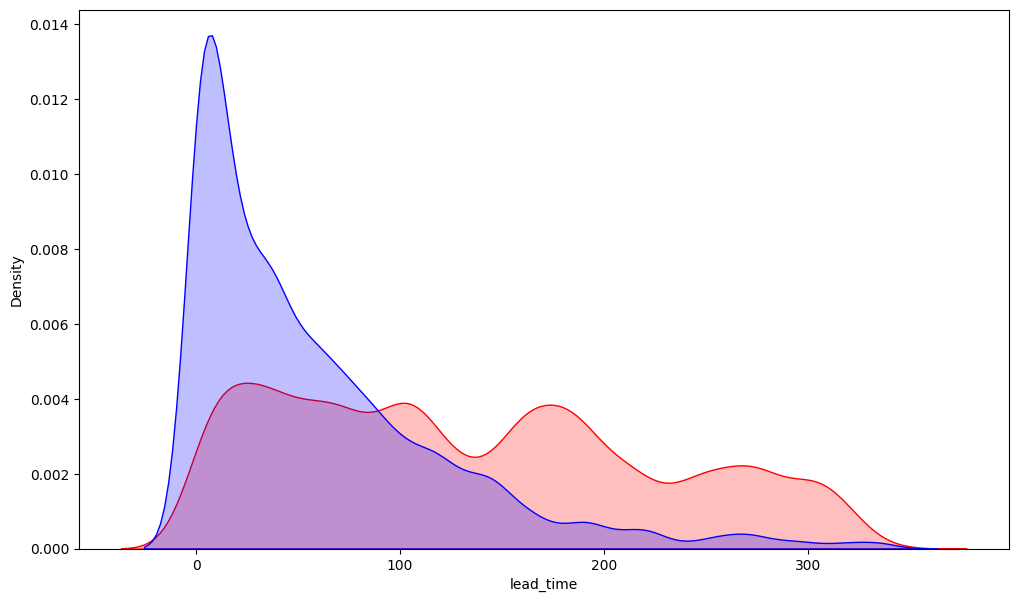

In [82]:
plt.figure(figsize=(12,7))

sns.kdeplot(cancel['lead_time'], label = 'cancel', shade = True, color = 'r')
sns.kdeplot(no_cancel['lead_time'], label = 'no_cancel', shade = True, color = 'b')

plt.xlabel('lead_time')

/var/folders/3l/0fkxv44s4277cxxnlw4sjqmr0000gn/T/ipykernel_27218/72926534.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cancel['no_of_adults'], label = 'cancel', shade = True, color = 'r')
/var/folders/3l/0fkxv44s4277cxxnlw4sjqmr0000gn/T/ipykernel_27218/72926534.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_cancel['no_of_adults'], label = 'no_cancel', shade = True, color = 'b')


Text(0.5, 0, 'no_of_adults')

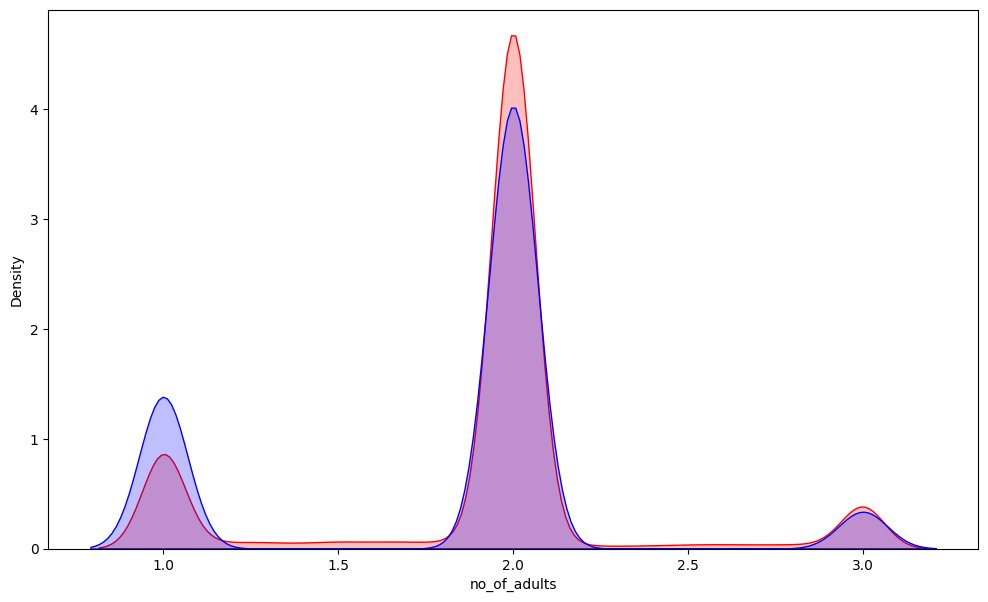

In [83]:
plt.figure(figsize=(12,7))

sns.kdeplot(cancel['no_of_adults'], label = 'cancel', shade = True, color = 'r')
sns.kdeplot(no_cancel['no_of_adults'], label = 'no_cancel', shade = True, color = 'b')

plt.xlabel('no_of_adults')

/var/folders/3l/0fkxv44s4277cxxnlw4sjqmr0000gn/T/ipykernel_27218/1425598765.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cancel['avg_price_per_room'], label = 'cancel', shade = True, color = 'r')
/var/folders/3l/0fkxv44s4277cxxnlw4sjqmr0000gn/T/ipykernel_27218/1425598765.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_cancel['avg_price_per_room'], label = 'no_cancel', shade = True, color = 'b')


Text(0.5, 0, 'avg_price_per_room')

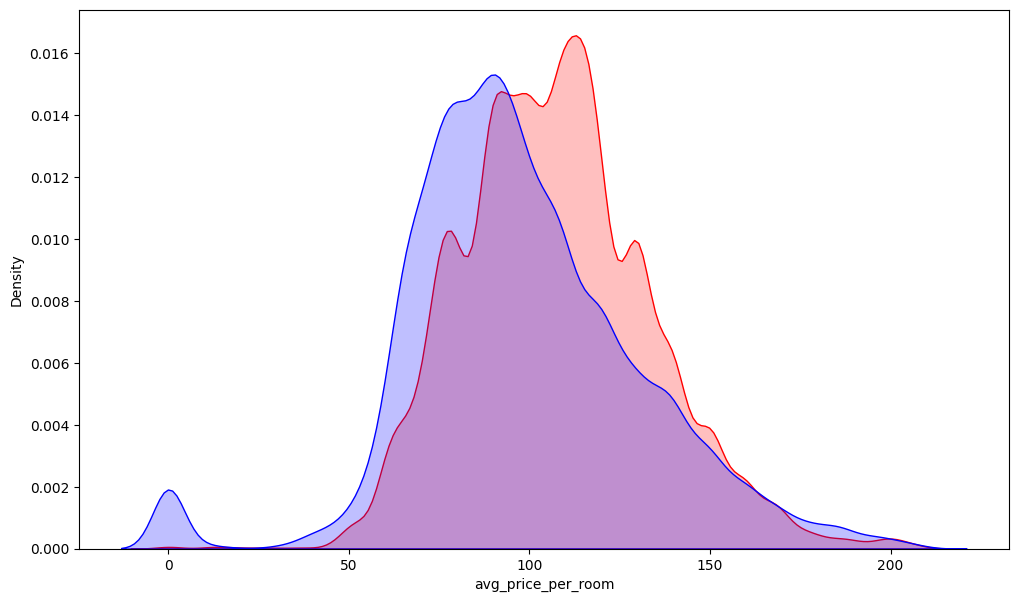

In [84]:
plt.figure(figsize=(12,7))

sns.kdeplot(cancel['avg_price_per_room'], label = 'cancel', shade = True, color = 'r')
sns.kdeplot(no_cancel['avg_price_per_room'], label = 'no_cancel', shade = True, color = 'b')

plt.xlabel('avg_price_per_room')

Part 5: StandardScaler

In [85]:
# Normalize features
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
scaled

array([[ 0.57685984, -0.32335971, -0.01053052, ..., -0.08984865,
        -1.26918453, -0.7481464 ],
       [-1.80481252, -0.32335971, -0.01053052, ..., -0.08984865,
         0.13342086,  0.76323196],
       [ 0.57685984, -0.32335971, -0.01053052, ..., -0.08984865,
        -1.43744334, -0.7481464 ],
       ...,
       [ 0.57685984, -0.32335971, -0.01053052, ..., -0.08984865,
         0.33080502,  0.76323196],
       [-0.98171248,  1.95552266, -0.01053052, ..., -0.08984865,
         0.09103033, -0.2258178 ],
       [ 0.57685984, -0.32335971, -0.01053052, ..., -0.08984865,
         0.63500046,  0.28018526]])

Part 6: Model (Supervised Learning)

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size = 0.3)

In [88]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

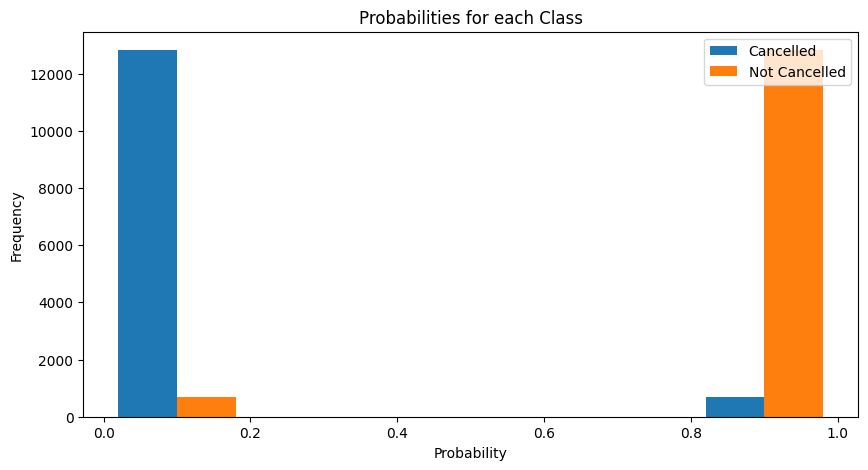

In [89]:
y_prob = nb.predict_proba(X_test)
y_prob_df = pd.DataFrame(y_prob, columns=['Prob of Cancelled', 'Prob of Not Cancelled'])
y_prob_df

# Probability for each Class
plt.figure(figsize=(10, 5))
plt.hist(y_prob, bins=5, label=['Cancelled', 'Not Cancelled'])
plt.legend(loc='upper right')
plt.title('Probabilities for each Class')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()


AUC: 0.201


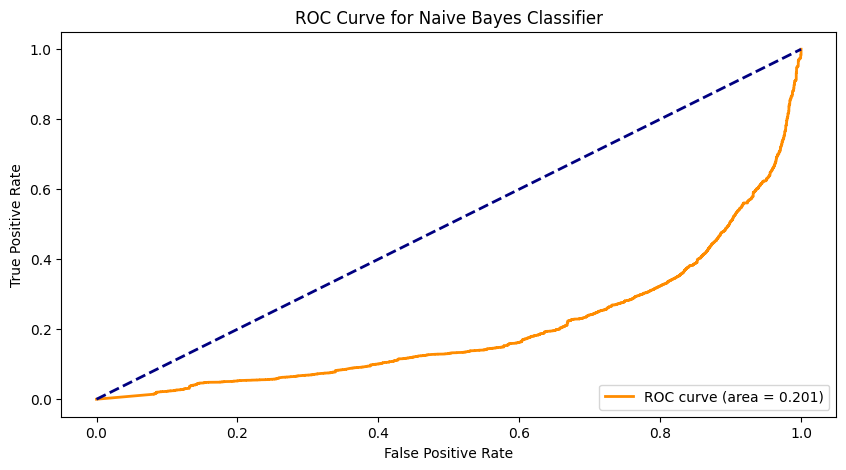

In [90]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_df['Prob of Cancelled'], pos_label=1)
auc = roc_auc_score(y_test, y_prob_df['Prob of Cancelled'])
print('AUC: %.3f' % auc)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [91]:
# Accuracy Report
print("Accuracy of Naive Bayes: ", 100 * accuracy_score(y_test, y_pred))

Accuracy of Naive Bayes:  53.53684677359746


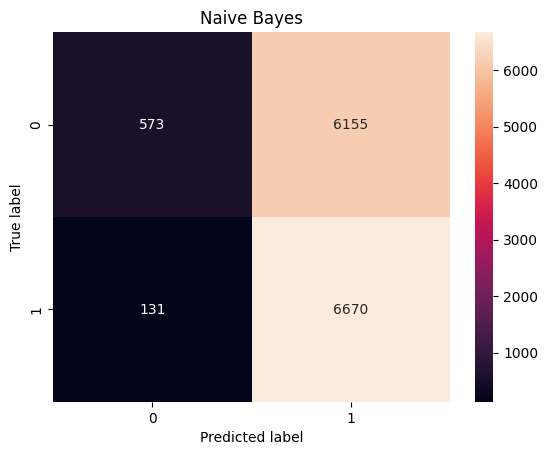

In [92]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Naive Bayes')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

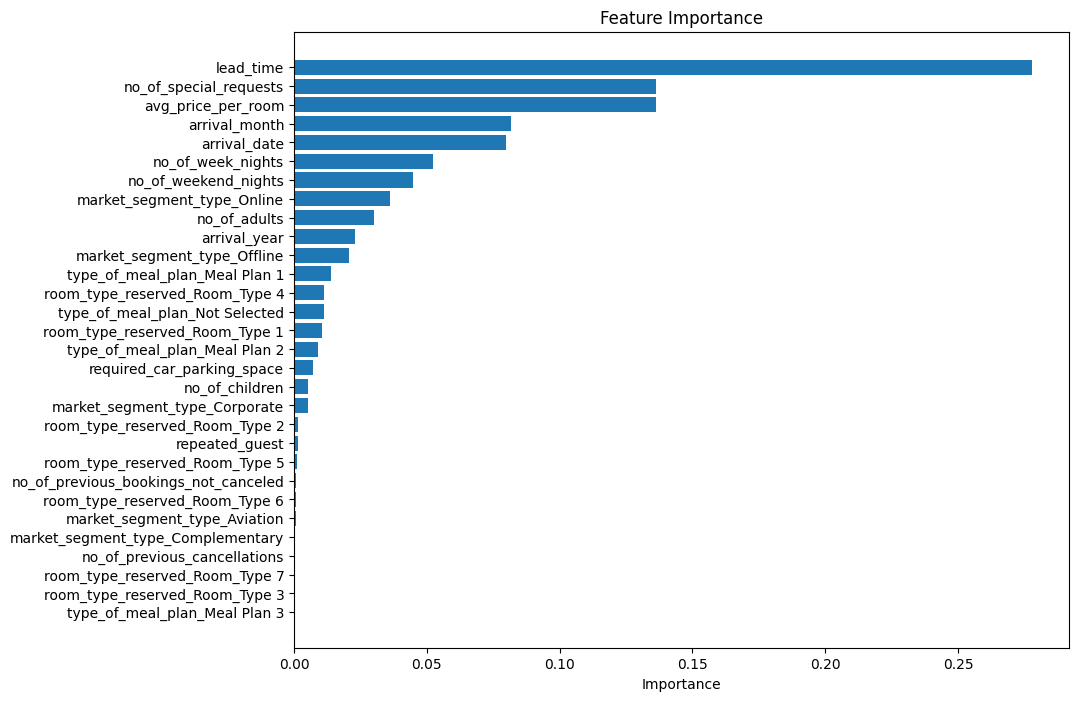

In [95]:
# Feature Importance
importances = rf.feature_importances_
features = df_oversampled.drop('booking_status', axis=1).columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

In [96]:
# Accuracy Report
print("Accuracy of Random Forest Classifier: ", 100 * accuracy_score(y_test, y_pred))

Accuracy of Random Forest Classifier:  92.47542316505285


In [97]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6728
           1       0.94      0.91      0.92      6801

    accuracy                           0.92     13529
   macro avg       0.93      0.92      0.92     13529
weighted avg       0.93      0.92      0.92     13529



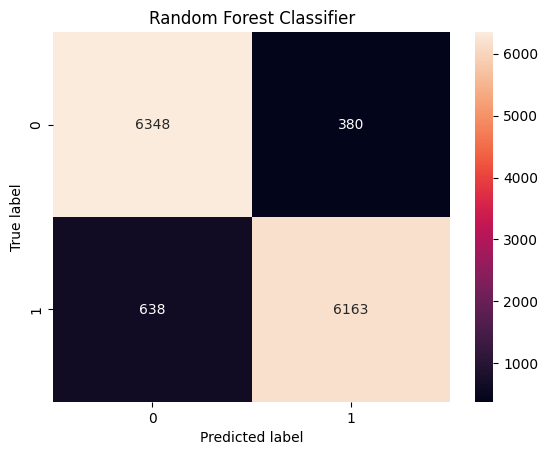

In [98]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Random Forest Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Part 7: Cluster (Unsupervised Learning)

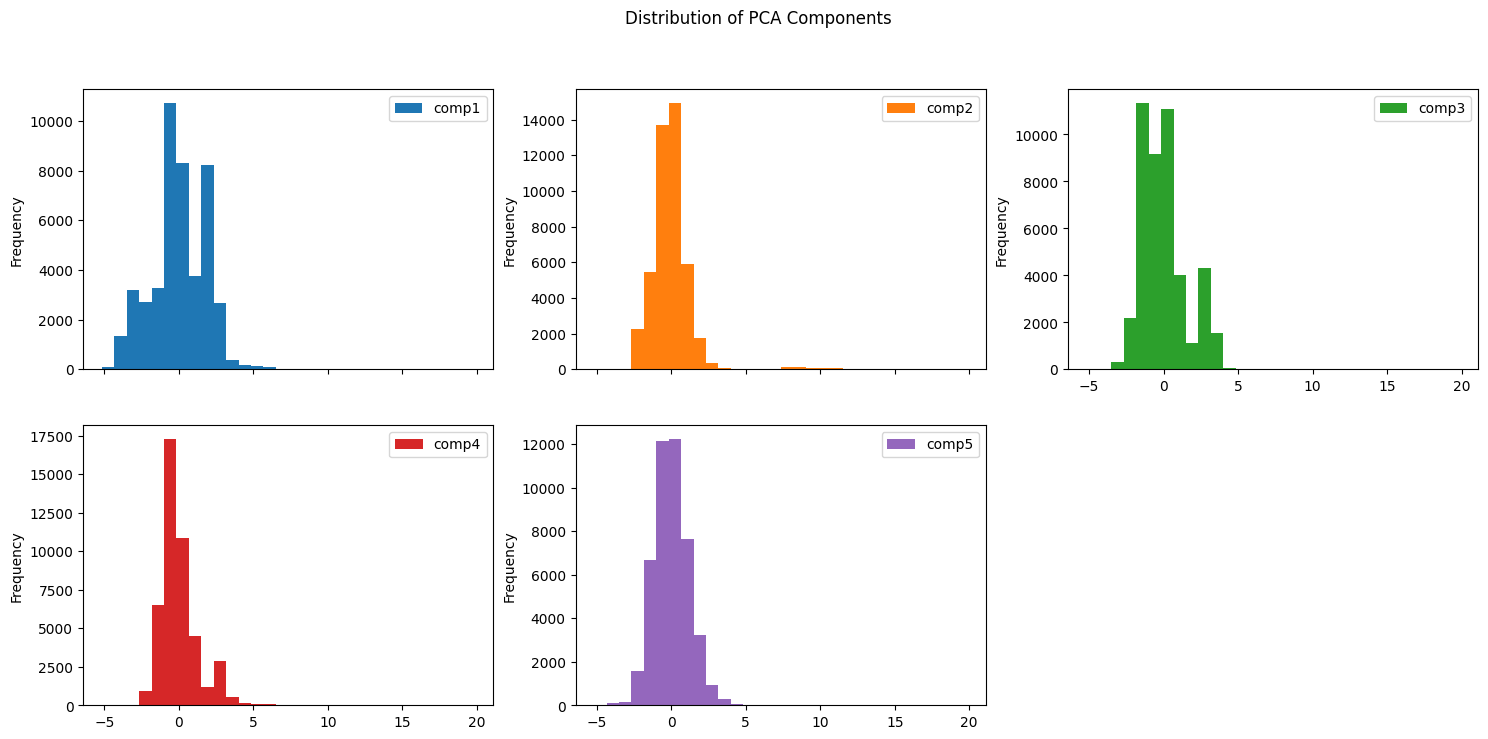

In [99]:
# PCA
pca = PCA(n_components=5, random_state=0)
data_pca = pd.DataFrame(pca.fit_transform(scaled), columns=['comp' + str(i) for i in range(1, 6)])
data_pca.plot(kind='hist', bins=30, figsize=(18, 8), subplots=True, layout=(2, 3),
                   title='Distribution of PCA Components')

pca.explained_variance_ratio_

# Add components to FMT data
X = pd.concat([X, data_pca], axis=1)

/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

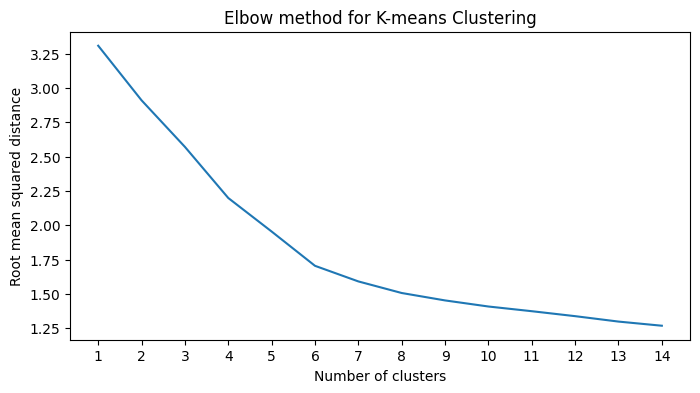

In [100]:
# Test different numbers of clusters
msd = [] # mean
for k in range(1, 15):
    kmeans = KMeans(k, random_state=0)
    kmeans.fit(data_pca)
    msd.append(np.sqrt(kmeans.inertia_ / data_pca.shape[0]))
    
# Elbow method
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(1, 15), y=msd)
plt.title('Elbow method for K-means Clustering')
plt.ylabel('Root mean squared distance')
plt.xlabel('Number of clusters')
plt.xticks(range(1, 15), range(1, 15));

In [101]:
# K-means clustering
kmeans = KMeans(6 , random_state=0)
kmeans.fit(data_pca)
X['cluster'] = kmeans.labels_

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [data_pca.columns])
cluster_centers    


/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,comp1,comp2,comp3,comp4,comp5
0,-2.795474,0.804347,-1.166409,0.690882,-0.517391
1,-0.468271,0.107655,0.292640,-0.784599,0.640439
2,1.725081,0.003945,-1.181583,-0.714345,-0.165737
3,-0.145702,-1.023216,2.758316,0.328773,-0.312694
4,1.984851,-1.922119,-0.528404,2.680765,-0.445732
5,4.576856,10.218570,2.150000,3.681338,0.472457


In [102]:
def segment_means(fmt_df, cols, group_col, count_col):
    
    df = fmt_df.groupby(group_col).mean()[cols].round(2)
    df['n_users'] = fmt_df.groupby(group_col)[count_col].count()
    df['pct_users'] = (100 * df.n_users / fmt_df.shape[0]).round(2)
    return df

In [103]:
# Cluster summary
feats = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'avg_price_per_room','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','required_car_parking_space','no_of_special_requests', 'comp1', 'comp2', 'comp3', 'comp4', 'comp5']
cluster_means = segment_means(X, feats, 'cluster', 'cluster')
cluster_means

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,avg_price_per_room,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,required_car_parking_space,no_of_special_requests,comp1,comp2,comp3,comp4,comp5,n_users,pct_users
cluster,,,,,,,,,,,,,,,,,
0,2.24,0.04,0.90,2.48,78.01,131.77,0.00,0.00,0.03,0.69,-2.80,0.80,-1.17,0.69,-0.52,7814,17.33
1,1.85,0.09,0.87,2.25,91.30,102.62,0.00,0.00,0.03,0.70,-0.47,0.11,0.29,-0.78,0.64,14726,32.66
2,1.66,0.01,0.69,2.13,117.51,86.97,0.00,0.00,0.01,0.12,1.72,0.00,-1.18,-0.71,-0.17,11417,25.32
3,1.89,0.03,0.78,1.90,66.07,96.44,0.00,0.00,0.02,0.59,-0.15,-1.02,2.76,0.33,-0.31,6864,15.22
4,1.87,0.01,0.63,1.90,164.67,107.41,0.00,0.00,0.00,0.26,1.98,-1.92,-0.53,2.68,-0.45,3670,8.14
5,1.25,0.01,0.45,1.34,10.65,69.61,0.26,1.83,0.16,0.35,4.58,10.22,2.15,3.68,0.47,603,1.34


In [104]:
def heatmap(data, title, ylabel, xlabel='Feature', vmin=-1, vmax=1, cmap='RdBu'):
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, vmin=vmin, vmax=vmax, cmap=cmap, fmt='.3f')
    plt.title(title, fontsize='x-large')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yticks(rotation=0)
    plt.show()

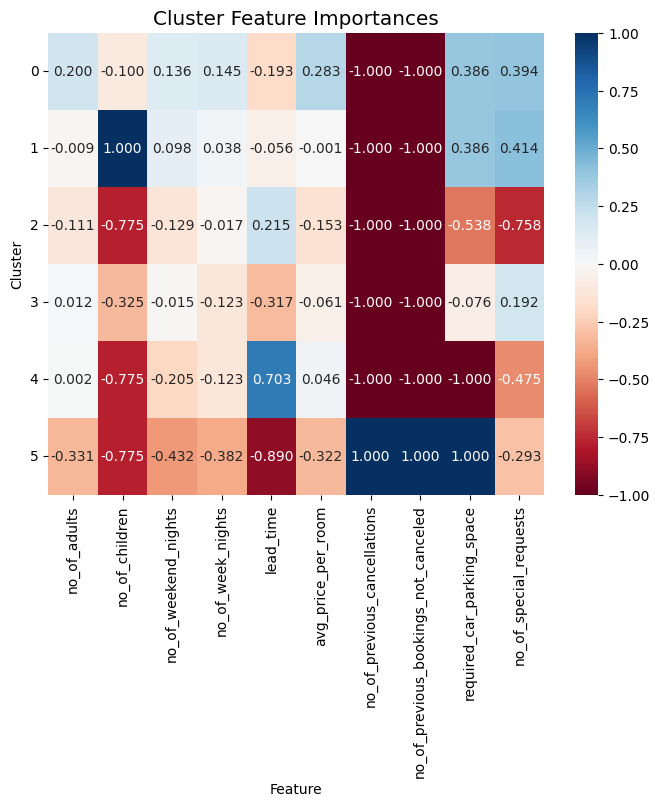

In [105]:
# Feature importances of
feats = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'avg_price_per_room','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','required_car_parking_space','no_of_special_requests']
overall_means = X[feats].mean()
feat_importances = cluster_means.iloc[:, :10] / overall_means - 1
def set_greater_than_one(x):
    if x > 1: return 1
    else: return x
feat_importances = feat_importances.applymap(set_greater_than_one)
heatmap(feat_importances, 'Cluster Feature Importances', 'Cluster')

In [106]:
feat_importances = feat_importances.rename(columns={'no_of_previous_cancellations': 'no_of_pre_cancel'})
feat_importances = feat_importances.rename(columns={'no_of_previous_bookings_not_canceled': 'no_of_pre_notcancel'})
feat_importances = feat_importances.rename(columns={'required_car_parking_space': 'required_parking'})
feat_importances

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,avg_price_per_room,no_of_pre_cancel,no_of_pre_notcancel,required_parking,no_of_special_requests
cluster,,,,,,,,,,
0,0.199673,-0.100157,0.136088,0.144592,-0.193165,0.282867,-1.0,-1.0,0.386086,0.393913
1,-0.009199,1.000000,0.098218,0.038441,-0.055711,-0.000927,-1.0,-1.0,0.386086,0.414115
2,-0.110957,-0.775039,-0.128999,-0.016943,0.215372,-0.153290,-1.0,-1.0,-0.537971,-0.757580
3,0.012224,-0.325118,-0.015390,-0.123095,-0.316657,-0.061094,-1.0,-1.0,-0.075943,0.191897
4,0.001512,-0.775039,-0.204738,-0.123095,0.703134,0.045706,-1.0,-1.0,-1.000000,-0.474757
5,-0.330540,-0.775039,-0.431956,-0.381551,-0.889850,-0.322301,1.0,1.0,1.000000,-0.292943


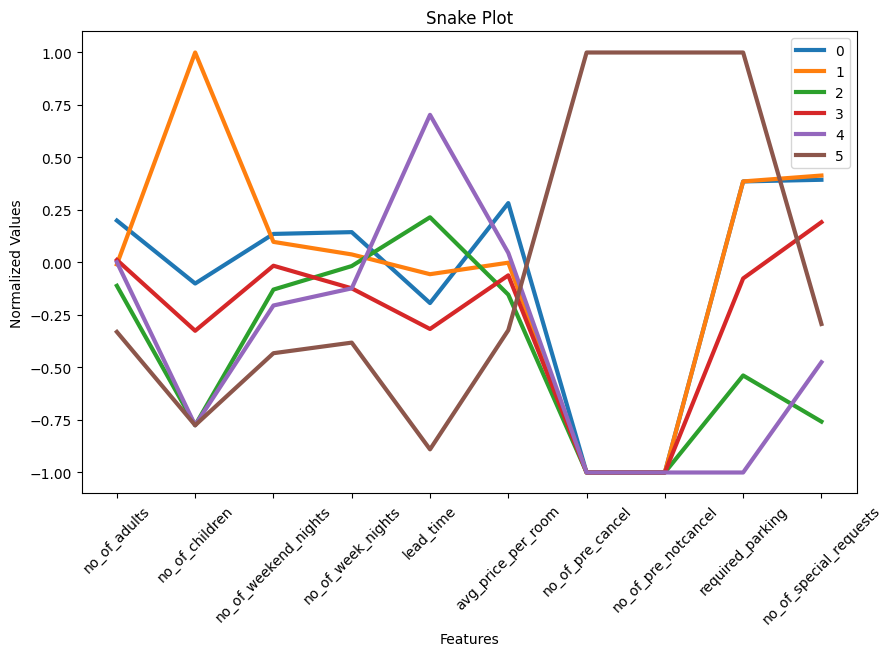

In [107]:
features = list(feat_importances.columns)

# Create snake plot
plt.figure(figsize=(10, 6))
for i in range(len(feat_importances)):
    plt.plot(features, feat_importances.iloc[i], label=feat_importances.index[i], linewidth=3)
plt.legend()
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.title('Snake Plot')
# Set x-axis label angle to 45 degrees
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0.98, 'K-means Visualizations - 6 clusters')

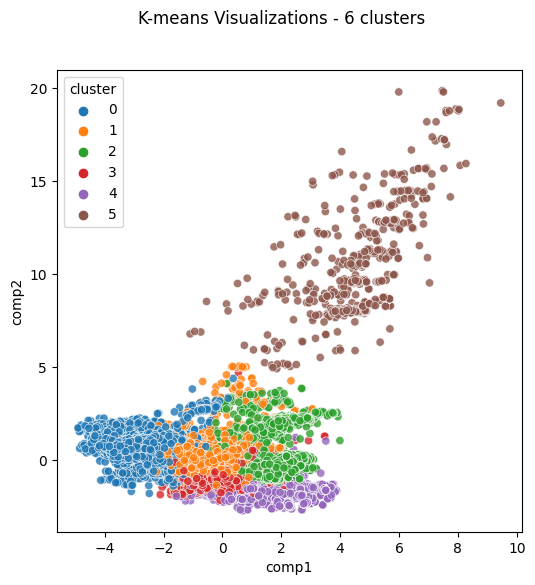

In [108]:
# Define custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
custom_palette = sns.color_palette(colors)

# Set the hue column and color palette
hue_column = 'cluster'
hue_palette = custom_palette

# Visualize clusters
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(data=X, x='comp1', y='comp2', hue=hue_column, alpha=0.8, palette=hue_palette) # first 2 components
fig.suptitle('K-means Visualizations - 6 clusters')

In [109]:
count_cenceled = pd.concat([X, y], axis = 1)
count_cenceled = count_cenceled.loc[:, ['cluster', 'booking_status']]

cluster_counts = count_cenceled['cluster'].value_counts()
cluster_cencel_counts = count_cenceled.loc[count_cenceled['booking_status'] == 1, 'cluster'].value_counts()
cancel_percent = (cluster_cencel_counts / cluster_counts) * 100
cancel_percent = pd.DataFrame(cancel_percent)
cancel_percent = cancel_percent.reset_index()
cancel_percent = cancel_percent.sort_values(by='index')
cancel_percent



,index,cluster
2,0,55.477348
0,1,52.458237
1,2,41.972497
3,3,51.048951
4,4,59.564033
5,5,0.829187


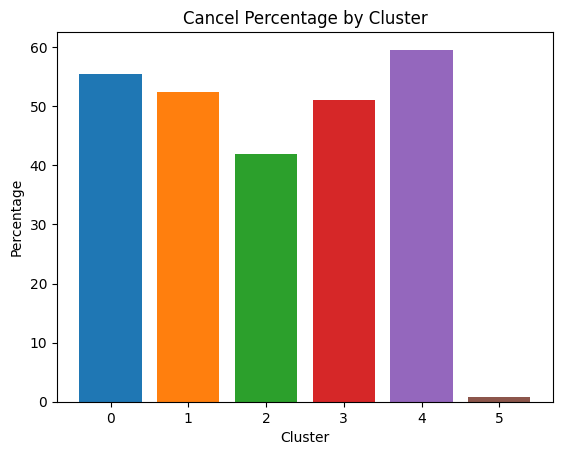

In [110]:
# set color list
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.bar(cancel_percent['index'], cancel_percent['cluster'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Cancel Percentage by Cluster')
plt.show()